# TrafficCounts OpenData
### Custom License 8/10/2018
### Spatial Dataset 8,221 Rows

The City of Houston captures traffic activity and throughput through the use of traffic counts, which are turned into _Average Daily Traffic_ (ADT) counts estimates to provide approximate estimates of the utilization of a street. The City of Houston’s Public Works and Engineering Department is responsible for performing traffic counts through the Traffic Operations Division. Each point in the dataset is reflective of a location where a traffic count device was placed in order to measure the volume of traffic. Traffic count studies are performed:

* **Proactively** through the year to assess street classifications assigned in the Major Thoroughfare & Freeway Plan (MTFP);
* **Re-actively** in response to citizen concerns around speeding or to asset citizen requests for a speed control through the Neighborhood Traffic Management Program (MTMP); or,
* **On an as needed basis** depending on construction or other considerations that would impact public safety on the roadways.

Traffic counts in Houston are performed regularly throughout the year, unlike some other cities; as such, this dataset updates regularly. Users interested in ADT information should consult the metadata file for more information.

## Load and describe data set


In [1]:
from ipyleaflet import *
from ipyleaflet import Map
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from IPython.display import display
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this magic makes plots in matplotlib to be displayed "inside" the jupyter notebook
%matplotlib inline

# reads data and stores in my_data as pandas.DataFrame
my_data = pd.read_csv('../dt/TrafficCounts_OpenData_wm.csv')

# First print the data types
print(my_data.dtypes)

# Second print descriptive statistics for numeric types
my_data.describe()

OBJECTID               int64
SEGMENT               object
ADT                    int64
ID                     int64
STREETNAME            object
STREETADDRESS         object
FILENAME              object
PERCENTILESPEED85     object
OUTCOME               object
COLLECTIONTYPE        object
X                    float64
Y                    float64
YEAR                   int64
PRE_NTMP_ADT         float64
POST_NTMP_ADT        float64
PRE_NTMP_SPEED       float64
POST_NTMP_SPEED      float64
POINT_X              float64
POINT_Y              float64
dtype: object


,OBJECTID,ADT,ID,X,Y,YEAR,PRE_NTMP_ADT,POST_NTMP_ADT,PRE_NTMP_SPEED,POST_NTMP_SPEED,POINT_X,POINT_Y
count,8367.000000,8367.000000,8367.000000,8.367000e+03,8.367000e+03,8367.000000,94.000000,246.000000,94.000000,246.000000,8367.000000,8367.000000
mean,4184.000000,10279.440301,4799.190988,3.109568e+06,1.383868e+07,2013.966655,265.617021,1216.743902,20.805319,28.620028,-95.403294,29.752404
std,2415.489184,9573.301631,2790.136514,2.862730e+04,2.633513e+04,2.293744,544.437228,1423.613819,80.699268,19.732763,0.090251,0.072388
min,1.000000,0.000000,2.000000,3.016782e+06,1.376339e+07,2007.000000,0.000000,104.000000,0.000000,20.000000,-95.694662,29.538248
25%,2092.500000,2803.000000,2360.500000,3.091396e+06,1.382814e+07,2012.000000,0.000000,312.250000,0.000000,25.500000,-95.460982,29.724615
50%,4184.000000,8355.000000,4790.000000,3.118298e+06,1.383886e+07,2014.000000,0.000000,657.000000,0.000000,27.000000,-95.375766,29.752115
75%,6275.500000,14924.500000,7238.500000,3.122924e+06,1.384667e+07,2016.000000,346.750000,1558.000000,25.800000,29.000000,-95.361012,29.774938
max,8367.000000,87529.000000,9584.000000,3.215575e+06,1.396225e+07,2018.000000,3394.000000,7846.000000,777.000000,333.000000,-95.076478,30.086616


## Missing and inconsistent data

### Missing data
Quite often when working with data, some values could be: a) missing for a wide range of reasons, or b) encoded in different ways, even within the same dataset, or worse within the same feature value. For example:
* no value (empty cell)
* NaN, NA, NULL, or another convention
* a value of 0 in a numeric feature

### Inconsistent data
Similarly, values for a feature could be inconsistent. For example:
* a numeric value way below or above a reasonable range (e.g. temperature in a city = 1000)
* different string values, for example, observations encoding the state of Texas as 'TX' 'Texas' 'texas' 'tx'

Observing the table above, notice that the feature 'PERCENTILESPEED85' is not included; although it should be. After all, it is supposed to be of numeric type.

In the output below that for 'PERCENTILESPEED85' feature, with the exception of 'nan', the rest of the values are float (for clarity purposes, only the first 5 entries in the array are included). Notice also, that numeric values are enclosed in ''; this means they are strings. On the other hand, for the feature 'POST_NTMP_SPEED', there is nan, followed by values, without '', which means they are floats!

So how did this happen? After digging and investigating values in 'PERCENTILESPEED85', there are two observations labeled 'na', and that forces the rest of the values to be converted into string!


In [2]:
# This feature has inconsistent data
print('**** PERCENTILESPEED85')
print(my_data['PERCENTILESPEED85'].unique()[0:5])

# This feature does not have inconsistent data
print('\n**** POST_NTMP_SPEED')
print(my_data['POST_NTMP_SPEED'].unique()[0:5])

**** PERCENTILESPEED85
[nan '0' '47.5' '1' '28.10']

**** POST_NTMP_SPEED
[ nan 27.2 31.5 33.4 22. ]


However, these inconsistencies were not detected when loading the data, even when printing unique values for that feature. Here's a screen shot using Microsoft Excel and grouping by values. The 'na' value is shown almost at the bottom:

![Excel Image ](../excel-screenshot.png)


In this case, pandas doesn't handle the 'na' as missing value, but rather as a string, and this could impact subsequent analysis.

Let's tweak this a littlbe bit and use the to_numeric() function.


In [3]:
# By using the pandas.to_numeric() function, we can read as numeric and handle missing values properly.
# look here for more information about the errors argument, which can take the values {‘ignore’, ‘raise’, ‘coerce’}. 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html

print('\n**** PERCENTILESPEED85')
print(pd.to_numeric(my_data['PERCENTILESPEED85'], errors='coerce').unique()[0:5])

# Another solution would be to use the 'na_values' argument in the read_csv() function, e.g.
# my_data = pd.read_csv('../dt/TrafficCounts_OpenData_wm.csv', na_values={'na','nan'})



**** PERCENTILESPEED85
[ nan  0.  47.5  1.  28.1]


### Displaying a map

In [4]:
Map(center=[29.74770501 ,-95.39656199], zoom=25)


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [5]:

#
# Create interactive buttons for selecting options
#
# First, create a list with numeric lists
columns = ['PRE_NTMP_ADT','PERCENTILESPEED85','PRE_NTMP_ADT','POST_NTMP_ADT','PRE_NTMP_SPEED','POST_NTMP_SPEED']

# create a dropdown button, using those features as options, and display the button
sel = widgets.Dropdown(description="Select feature:")
sel.options = columns
display(sel)
sel = widgets.Dropdown(description="Select feature:")
sel.options = columns
display(sel)

# define a call-back funtion that will be triggered when the button is clicked
def on_button_clicked(b) :
    sns.set_style("whitegrid")
    sns.set_context(rc={"figure.figsize": (120, 190)})
    sns.barplot(x='POST_NTMP_ADT', y=sel.value, data=my_data, color='Green')

# Create a new button to be clicked for plotting the data
button = widgets.Button(description="Click to plot data")    
display(button)

# Register a call back function to be triggered when the button is clicked
button.on_click(on_button_clicked) 




Dropdown(description='Select feature:', options=('PRE_NTMP_ADT', 'PERCENTILESPEED85', 'PRE_NTMP_ADT', 'POST_NT…

Dropdown(description='Select feature:', options=('PRE_NTMP_ADT', 'PERCENTILESPEED85', 'PRE_NTMP_ADT', 'POST_NT…

Button(description='Click to plot data', style=ButtonStyle())

In [6]:
# create a dropdown button with valid years to be selected
sel_2 = widgets.Dropdown(description="What year?")
# values are selected 
sel_2.options = my_data.YEAR.sort_values(ascending=False).unique()
display(sel_2)

# define a call-back funtion that will be triggered when the button is clicked
def on_year_clicked(y) :
    # Here I'm just printing the types of different objects for debugging purposes
    print(type(y))
    print(type(sel_2.value))
    print(sel_2.value)
    print(sel.value)

    # I'm chaining functions to the dataframe:
    # 1) filter for year equal to the one selected in the drop down (given by sel_2.value)
    # 2) filter values for the column given by the name selected in the drop down (sel.value)
    # 3) include only values not null and different of 0
    df = my_data[(my_data.YEAR == sel_2.value)].loc[(my_data[sel.value].notnull() & my_data[sel.value] != 0)]
    sns.set_style("whitegrid")
    sns.set_context(rc={"figure.figsize": (12, 19)})
    sns.barplot(x='YEAR', y=sel.value, data=df, color='Green')    

# Create a new button to be clicked for plotting the data    
year_button = widgets.Button(description="Choose year")
display(year_button)

# Register a call back function to be triggered when the button is clicked
year_button.on_click(on_year_clicked)

# TODO: display scatterplots for two numeric variables

Dropdown(description='What year?', options=(2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, …

Button(description='Choose year', style=ButtonStyle())

### Get the top 5 streets by ADT value

In [7]:
my_data_1 = my_data[['ADT','STREETNAME']].sort_values('ADT', ascending=False).head(5)
print(my_data_1)

        ADT  STREETNAME
6035  87529        SH 6
3482  76321        SH 6
6286  74741  WESTHEIMER
131   74553        SH 6
3223  74077     FM 1960


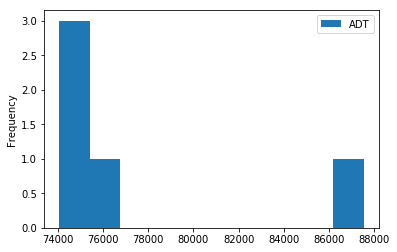

In [8]:

# plot a histogram
my_data_1.plot.hist()



In [9]:
# use the ! to execute operating system commands, e.g. ls, cat, cd, etc.
!ls

City-of-Houston-Data.ipynb  Trapezoid_Rule.ipynb
Cool-data-example.ipynb     excel-screenshot.png
Feature Ing Classwork.ipynb


In [10]:
# liss magics
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [11]:
# executing the ls magic, which lists the contents of a given directory, including file permissions
# last time of modification, etc.
%ls -la

total 400
drwxr-xr-x  8 andresvelasquez  staff    256 Oct 18 15:34 ./
drwxr-xr-x  8 andresvelasquez  staff    256 Oct 18 15:33 ../
drwxr-xr-x  6 andresvelasquez  staff    192 Oct 18 15:32 .ipynb_checkpoints/
-rw-r--r--  1 andresvelasquez  staff  72614 Oct 18 14:15 City-of-Houston-Data.ipynb
-rw-r--r--  1 andresvelasquez  staff  49703 Oct 16 15:13 Cool-data-example.ipynb
-rw-r--r--  1 andresvelasquez  staff   6763 Oct 18 15:34 Feature Ing Classwork.ipynb
-rw-r--r--  1 andresvelasquez  staff  23127 Oct 16 15:13 Trapezoid_Rule.ipynb
-rw-r--r--  1 andresvelasquez  staff  41985 Oct 16 15:13 excel-screenshot.png


In [12]:
%matplotlib inline

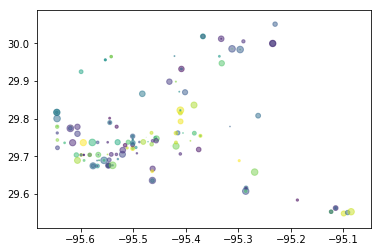

In [13]:
# extracts the top 150 observations given the ADT feature value
top_150 = my_data.sort_values('ADT', ascending=False).head(150)

# use only a subset of features
result = top_150[['SEGMENT','STREETNAME','POINT_X','POINT_Y']]
N = 150
x = result['POINT_X']
y = result['POINT_Y']

# just give a random numer to assign color to each observation
colors = np.random.rand(N)

# determine the area of each circle (observation)
area = np.pi * (15 * np.random.rand(N)**2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


### Embedding an external html page in the Jupyter Notebook

In [14]:
%%HTML
<iframe width="600" height="600" src="https://traffic.houstontranstar.org/cctv/transtar/" frameborder="0" allowfullscreen></iframe>